In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from interval_model import *

fname = "..\\..\\data\\VRPTW\\solomon_25\\R101.json"

tlim = 10

cvrptw_prob = CVRPTWProblem()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
# model, data_model = build_model(cvrptw_prob)
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')

params = CpoParameters()
# params.SearchType = 'Restart'
params.LogPeriod = 100000
params.LogVerbosity = 'Terse'
model.set_parameters(params=params)

best_known_solution: 828.94
num_cust= 25
num_vehicles= 25
n= 75
len(vrp.distance_matrix)=  75
vrp.distance_matrix[0]=  [0, 325, 145, 322, 322, 248, 210, 315, 178, 155, 264, 166, 264, 468, 453, 424, 407, 228, 282, 164, 292, 392, 461, 277, 376, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152]
vrp.distance_matrix[1]=  [325, 0, 344, 202, 238, 164, 362, 360, 474, 432, 502, 234, 94, 211, 130, 251, 326, 274, 474, 490, 104, 122, 233, 349, 301, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180]
vrp.distance_matrix[2]=  [145, 344, 0, 250, 427, 335, 353, 450, 150, 291, 403, 111, 320, 531, 471, 514, 522, 

{'LogPeriod': 100000, 'LogVerbosity': 'Terse'}

In [20]:
solution = model.solve(TimeLimit=tlim)

C:/Users/micha/OneDrive - České vysoké učení technické v Praze/Dokumenty/PycharmProjects/optimizin/General-Optimization-Solver/src/vrp/interval_model.py:168(stream:2292:1): Warning: Constraint 'span': master interval variable 'T0' is optional but spanned interval 'V25_0' is present.
                                                                                                                                                                                              span(T0, [V0_0, V1_0, V2_0, V3_0, V4_0, V5_0, V6_0, V7_0, V8_0, V9_0, V10_0, V11_0, V12_0, V13_0, V14_0, V15_0, V16_0, V17_0, V18_0, V19_0, V20_0, V21_0, V22_0, V23_0, V24_0, V25_0, V26_0, V27_0, V28_0, V29_0, V30_0, V31_0, V32_0, V33_0, V34_0, V35_0, V36_0, V37_0, V38_0, V39_0, V40_0, V41_0, V42_0, V43_0, V44_0, V45_0, V46_0, V47_0, V48_0, V49_0, V50_0, V51_0, V52_0, V53_0, V54_0, V55_0, V56_0, V57_0, V58_0, V59_0, V60_0, V61_0, V62_0, V63_0, V64_0, V65_0, V66_0, V67_0, V68_0, V69_0, V70_0, V71_0, V72_0, V73_0, V74_0])


In [8]:
import docplex

solutions = []

for key, sol in solution.solution.var_solutions_dict.items():
    match type(sol):
        case docplex.cp.solution.CpoIntervalVarSolution:
            if sol.presence != False and sol.size != 0:
                print(sol)

        case docplex.cp.solution.CpoSequenceVarSolution:
            if sol.lvars != []:
                print(sol)
                if len(sol.lvars) > 2:
                    solutions.append(sol)
        case _:
            print()
            print()
            print(type(sol))
            print(key, sol)
            print()
            print()


V19_14: (start=100, end=1000, size=900, length=900)
V19_14: (start=100, end=1000, size=900, length=900)
V20_14: (start=4762, end=5662, size=900, length=900)
V20_14: (start=4762, end=5662, size=900, length=900)
V21_14: (start=1028, end=1928, size=900, length=900)
V21_14: (start=1028, end=1928, size=900, length=900)
V22_14: (start=3826, end=4726, size=900, length=900)
V22_14: (start=3826, end=4726, size=900, length=900)
V23_14: (start=1964, end=2864, size=900, length=900)
V23_14: (start=1964, end=2864, size=900, length=900)
V24_14: (start=2884, end=3784, size=900, length=900)
V24_14: (start=2884, end=3784, size=900, length=900)
V0_16: (start=5723, end=6623, size=900, length=900)
V0_16: (start=5723, end=6623, size=900, length=900)
V1_16: (start=4803, end=5703, size=900, length=900)
V1_16: (start=4803, end=5703, size=900, length=900)
V2_16: (start=6659, end=7559, size=900, length=900)
V2_16: (start=6659, end=7559, size=900, length=900)
V3_16: (start=3867, end=4767, size=900, length=900)
V3

[0, 5, 14, 15, 22, 23, 4, 25, 24, 1, 0]
[0, 5, 14, 15, 22, 23, 4, 25, 24, 1, 0]
[0, 2, 21, 12, 3, 9, 20, 10, 11, 19, 7, 18, 8, 17, 16, 6, 13, 0]
[0, 2, 21, 12, 3, 9, 20, 10, 11, 19, 7, 18, 8, 17, 16, 6, 13, 0]


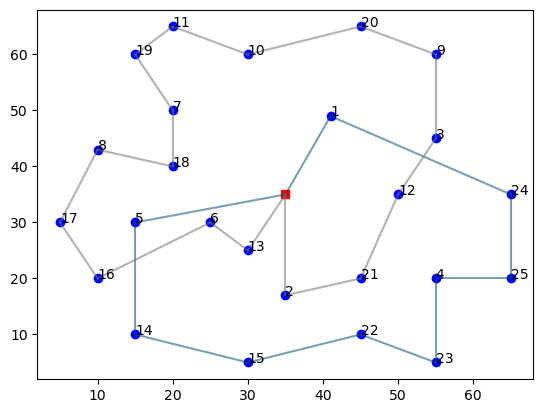

In [22]:
# convert sequence to path
paths = []
for solution in solutions:
    path = []
    for i in range(len(solution.lvars)):
        prdel = int(solution.lvars[i].get_name()[1:].split('_')[0])+1
        if prdel > cvrptw_prob.nb_customers:
            prdel = 0
        path.append(prdel)
    print(path)
    paths.append(path)

paths = {'paths': paths}

visualize_path(paths, None, cvrptw_prob)


In [ ]:
ref_paths = instance['our_best_solution']
visualize_path(ref_paths, None, cvrptw_prob)

best_known_solution: 191.3
num_cust= 25
num_vehicles= 25
n= 75
23 V23 = intervalVar(size=900) TW23 = intervalVar(start=650, end=2340)
C:/Users/micha/OneDrive - České vysoké učení technické v Praze/Dokumenty/PycharmProjects/optimizin/General-Optimization-Solver/src/vrp/interval_model.py:183(stream:2028:595): Warning: Boolean expression 'presenceOf' is always true because interval variable 'V25_0' is declared present.
                                                                                                                                                                                                presenceOf(V25_0)
C:/Users/micha/OneDrive - České vysoké učení technické v Praze/Dokumenty/PycharmProjects/optimizin/General-Optimization-Solver/src/vrp/interval_model.py:183(stream:2028:1171): Warning: Boolean expression 'presenceOf' is always true because interval variable 'V50_0' is declared present.
                                                                                   

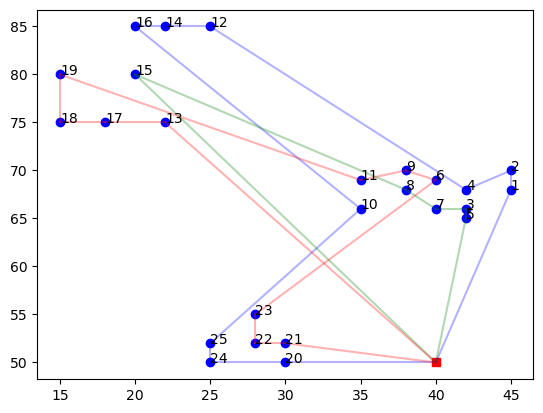

Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 20 is 100
Node 20 arrive 100 early 100 late 730 start 100
Distance from 20 to 24 is 50
Node 24 arrive 1050 early 650 late 1440 start 1050
Distance from 24 to 25 is 20
Node 25 arrive 1970 early 1690 late 2240 start 1970
Distance from 25 to 10 is 172
Node 10 arrive 3042 early 3570 late 4100 start 3570
Distance from 10 to 16 is 242
Node 16 arrive 4712 early 4750 late 5280 start 4750
Distance from 16 to 14 is 20
Node 14 arrive 5670 early 5670 late 6200 start 5670
Distance from 14 to 12 is 30
Node 12 arrive 6600 early 6520 late 7210 start 6600
Distance from 12 to 4 is 240
Node 4 arrive 7740 early 7270 late 7820 start 7740
Distance from 4 to 2 is 36
Node 2 arrive 8676 early 8250 late 8700 start 8676
Distance from 2 to 1 is 20
Node 1 arrive 9596 early 9120 late 9670 start 9596
Distance from 1 to 0 is 186
Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 5 is 151
Node 5 arrive 151 early 150 late 670 start 151
Distance from 5 to 

In [13]:
from interval_model import *

fname = "..\\..\\data\\VRPTW\\solomon_25\\C101.json"

tlim = 100

cvrptw_prob = CVRPTWProblem()
with open(fname, 'r') as f:
    instance = json.load(f)
    print('best_known_solution:', instance['best_known_solution']['Distance'])
cvrptw_prob.from_dict(instance['data'])
# model, data_model = build_model(cvrptw_prob)
model, data_model = build_model(cvrptw_prob)
# solution = model.solve(TimeLimit=tlim,
#                         agent='local',
#                        execfile='/home/lukesmi1/Cplex/cpoptimizer/bin/x86-64_linux/cpoptimizer')

params = CpoParameters()
# params.SearchType = 'Restart'
params.LogPeriod = 100000
params.LogVerbosity = 'Terse'
model.set_parameters(params=params)

solution = model.solve(TimeLimit=tlim)

import docplex

solutions = []

for key, sol in solution.solution.var_solutions_dict.items():
    match type(sol):
        case docplex.cp.solution.CpoIntervalVarSolution:
            pass
            # if sol.presence != False and sol.size != 0:
            #     print(sol)

        case docplex.cp.solution.CpoSequenceVarSolution:
            if sol.lvars != []:
                # print(sol)
                if len(sol.lvars) > 2:
                    solutions.append(sol)
        case _:
            print()
            print()
            print(type(sol))
            print(key, sol)
            print()
            print()

# convert sequence to path
paths = []
for sol in solutions:
    path = []
    for i in range(len(sol.lvars)):
        prdel = int(sol.lvars[i].get_name()[1:].split('_')[0])+1
        if prdel > cvrptw_prob.nb_customers:
            prdel = 0
        path.append(prdel)
    if path in paths:
        continue
    print(path)
    paths.append(path)

paths = {'paths': paths}

visualize_path(paths, None, cvrptw_prob)
validate_path(paths, cvrptw_prob)

191.3


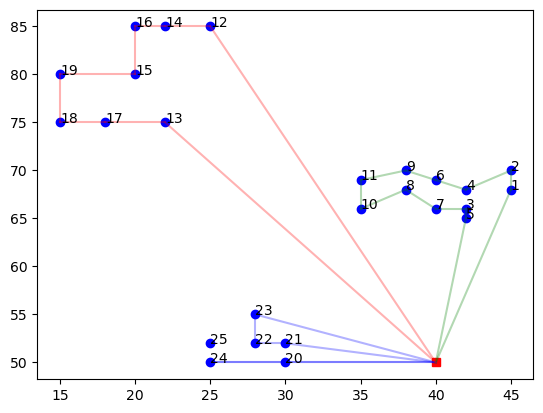

In [12]:
ref_paths = instance['our_best_solution']
print(ref_paths['total_distance'])
visualize_path(ref_paths, None, cvrptw_prob)

In [28]:
validate_path(paths, cvrptw_prob)


Node 0 arrive 0 early 0 late 0 start 0
Distance from 0 to 5 is 151
Node 5 arrive 151 early 150 late 670 start 151
Distance from 5 to 3 is 10
Node 3 arrive 1061 early 650 late 1460 start 1061
Distance from 3 to 7 is 20
Node 7 arrive 1981 early 1700 late 2250 start 1981
Distance from 7 to 8 is 28
Node 8 arrive 2909 early 2550 late 3240 start 2909
Distance from 8 to 11 is 31
Node 11 arrive 3840 early 4480 late 5050 start 4480
Distance from 11 to 9 is 31
Node 9 arrive 5411 early 5340 late 6050 start 5411
Distance from 9 to 6 is 22
Node 6 arrive 6333 early 6210 late 7020 start 6333
Distance from 6 to 4 is 22
Node 4 arrive 7255 early 7270 late 7820 start 7270
Distance from 4 to 2 is 36
Node 2 arrive 8206 early 8250 late 8700 start 8250
Distance from 2 to 1 is 20
Node 1 arrive 9170 early 9120 late 9670 start 9170
Distance from 1 to 23 is 214
Node 23 arrive 10284 early 7320 late 7770 start 10284


AssertionError: Too late for node 23

In [6]:
print(solution.solution['V23'])
print(solution.solution['TW23'])



IntervalVarValue(start=1964, end=2864, size=900)
IntervalVarValue(start=524, end=2864, size=2340)
